import libraries and set style for matplotlib

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)

#print(plt.style.available)
#plt.style.use('default')

#plt.style.use("seaborn")
plt.style.use("tableau-colorblind10")

Read in data

In [139]:
df_all=pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_all.csv')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2138 non-null   int64  
 1   cat_name                2138 non-null   object 
 2   num_images              2138 non-null   int64  
 3   num_videos              2138 non-null   int64  
 4   age                     2138 non-null   object 
 5   breed                   2138 non-null   object 
 6   color                   1825 non-null   object 
 7   size                    2138 non-null   object 
 8   sex                     2138 non-null   object 
 9   characteristics         844 non-null    object 
 10  house_trained           2125 non-null   object 
 11  health                  2073 non-null   object 
 12  good_in_a_home_with     1337 non-null   object 
 13  adoption_fee            379 non-null    object 
 14  prefers_a_home_without  327 non-null    

In [148]:
df_all.head(10)

,Unnamed: 0,cat_name,num_images,num_videos,age,breed,color,size,sex,characteristics,...,data_set,num_cats,unique_cat_id,thirty_days,other_days,spec_needs,coat_length_miss,more_than_one_cat,without_story,mt1
0,0,Ashe and Billie,6,0,Adult,Domestic Short Hair,missing,Medium,Female,NaN,...,one_day,1,Ashe and Billie - KittyKind,False,True,False,missing,False,False,False
1,1,Billie and Ashe,6,0,Adult,Domestic Short Hair,missing,Medium,Female,NaN,...,one_day,1,Billie and Ashe - KittyKind,False,True,False,missing,False,False,False
2,2,Holiday Hibiscus,2,0,Kitten,Domestic Short Hair,Gray / Blue / Silver,Medium,Male,NaN,...,one_day,1,Holiday Hibiscus - Liberty Humane Society,False,True,False,Short,False,False,False
3,3,"Favorite Babies-Wonton, Lichee, Sprout & Dumpling",3,0,Kitten,Domestic Short Hair,White,Small,Male,NaN,...,one_day,1,"Favorite Babies-Wonton, Lichee, Sprout & Dumpl...",False,True,False,missing,False,False,False
4,4,Romeo and Guero,4,0,Young,Domestic Short Hair,missing,Medium,Male,"Friendly, Affectionate, Gentle, Playful",...,one_day,1,Romeo and Guero - The Lucky Cat Rescue,False,True,False,Medium,False,False,False
5,5,Foxy,4,0,Adult,Domestic Short Hair,Tabby (Brown / Chocolate),Medium,Female,"Smart, Independent, Quiet",...,one_day,1,Foxy - Union City Feral Cat Committee,False,True,False,missing,False,False,False
6,6,Felix,2,0,Adult,Domestic Short Hair,Black & White / Tuxedo,Medium,Male,"Playful, Smart, Curious, Independent",...,one_day,1,Felix - Union City Feral Cat Committee,False,True,False,missing,False,False,False
7,7,Crescent,3,0,Adult,Domestic Short Hair,Tabby (Brown / Chocolate),Medium,Female,"Independent, Quiet, Smart",...,one_day,1,Crescent - Union City Feral Cat Committee,False,True,False,missing,False,False,False
8,8,Toby,4,0,Kitten,Domestic Short Hair,Tabby (Brown / Chocolate),Medium,Male,"Friendly, Affectionate, Playful, Smart, Brave,...",...,one_day,1,Toby - Union City Feral Cat Committee,False,True,False,missing,False,False,False
9,9,Panda,0,0,Adult,Domestic Short Hair & Tuxedo Mix,Black & White / Tuxedo,Medium,Male,"Friendly, Playful, Smart, Curious, Independent",...,one_day,1,Panda - Union City Feral Cat Committee,False,True,False,missing,False,False,False


Create frequency distribution function

In [114]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        'Cumulative Frequency': datax.values.cumsum(),
        'Cumulative Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    
    return(datay.set_index(variable_))

In [113]:
df_all['data_set'].value_counts()

proc_freq(df_all,'data_set')

,Frequency,Percent,Cumulative Frequency,Cumulative Percent
data_set,,,,
thirty_days,1433,67.03,1433,67.03
fourteen_days,345,16.14,1778,83.16
seven_days,204,9.54,1982,92.70
thirty_day_spec_needs,104,4.86,2086,97.57
one_day,38,1.78,2124,99.35
spec_needs_other,14,0.65,2138,100.00


In [95]:
if df_all['data_set'] == 'thirty_day_spec_needs':
    df_all['data_set'] = 'spec_needs_thirty_days'
else:
    df_all['data_set'] = df_all['data_set']
    
df_all['data_set'].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [140]:
# all.tail()

df_all['unique_cat_id'] =df_all['cat_name'] + ' - ' + df_all['rescue_group']
# all.tail()

group1=df_all.groupby(['rescue_group'])

df_all.groupby(['rescue_group'])['unique_cat_id'].nunique()

#df_all.head()


    

df_all['thirty_days']= df_all['data_set'] == 'thirty_days'

df_all['other_days']= df_all['data_set'].apply(lambda x:  x in['fourteen_days','seven_days','one_day'])

df_all['spec_needs']= df_all['data_set'].apply(lambda x:  x in ['thirty_day_spec_needs','spec_needs_other'])

#Replace null values of color with 'missing'
df_all['color'].fillna('missing',inplace=True)
df_all['color'] = df_all['color'].astype(str)

df_all['coat_length_miss'] = df_all['coat_length'].fillna('missing')


m_than_one = [True if x in ['and','&'] else False for x in df_all['cat_name']]
print('len m_than_one = ',len(m_than_one))
df_all['more_than_one_cat'] = pd.Series(m_than_one)

df_all['pet_story_num_words'].fillna(0,inplace=True)

df_all['without_story'] = df_all['pet_story_num_words'] == 0
df_all['without_story'].value_counts(normalize=True)

len m_than_one =  2138


False    0.974743
True     0.025257
Name: without_story, dtype: float64

In [146]:
for cat in df_all['cat_name']:
    if 'and' in cat or '&' in cat:
        df_all['mt1'] = True
    else:
        df_all['mt1'] = False
        
df_all['mt1'].value_counts()

False    2138
Name: mt1, dtype: int64

In [143]:
print(proc_freq(df_all,'coat_length'))
print(' ')
print(proc_freq(df_all,'coat_length_miss'))
print(' ')
print(proc_freq(df_all,'more_than_one_cat'))

             Frequency  Percent  Cumulative Frequency  Cumulative Percent
coat_length                                                              
Hairless             2     0.14                     2                0.14
Long                30     2.03                    32                2.16
Medium              77     5.20                   109                7.36
Short             1371    92.64                  1480              100.00
 
                  Frequency  Percent  Cumulative Frequency  Cumulative Percent
coat_length_miss                                                              
Hairless                  2     0.09                     2                0.09
Long                     30     1.40                    32                1.50
Medium                   77     3.60                   109                5.10
Short                  1371    64.13                  1480               69.22
missing                 658    30.78                  2138              100.00
 

In [127]:
proc_freq(df_all,'without_story')

,Frequency,Percent,Cumulative Frequency,Cumulative Percent
without_story,,,,
False,2084,97.47,2084,97.47
True,54,2.53,2138,100.00


In [22]:
Tabby = [True if 'Tabby' in cat else False for cat in df_all['color']]
print(len(Tabby))
df_all['Tabby'] = pd.Series(Tabby)

2138


In [149]:
breed_type=[]
for breed in df_all['breed']:
    if 'Domestic Short Hair' in breed:
        breed_type.append('DSH')
    elif 'Long Hair' in breed:   #Note 'Long Hair' must be identified before 'Mix','Tuxedo' etc
        breed_type.append('DLH')
    elif 'Mix' in breed:
        breed_type.append('DSH')
    elif 'Tuxedo' in breed:
        breed_type.append('DSH')
    elif 'Tabby' in breed:
        breed_type.append('DSH')
    elif 'Calico' in breed:
        breed_type.append('DSH')
    else:
        breed_type.append('Other')

print('list length = ',len(breed_type))
        
df_all['breed_type'] = pd.Series(breed_type)
df_all['breed_type'].value_counts()#(normalize=True)
proc_freq(df_all,'breed_type')

list length =  2138


,Frequency,Percent,Cumulative Frequency,Cumulative Percent
breed_type,,,,
DLH,40,1.87,40,1.87
DSH,1888,88.31,1928,90.18
Other,210,9.82,2138,100.00


In [27]:
print('other_days','#'*10,df_all['other_days'].value_counts())
print('thirty_days  ','#'*10,df_all['thirty_days'].value_counts())
print('special_needs  ','#'*10,df_all['spec_needs'].value_counts())

other_days ########## False    1551
True      587
Name: other_days, dtype: int64
thirty_days   ########## True     1433
False     705
Name: thirty_days, dtype: int64
special_needs   ########## False    2020
True      118
Name: spec_needs, dtype: int64


Create two separate data frames one for thirty days and one for less than thirty days. 

It does not make sense to analyze special needs as almost all cats in that category have been on site for thirty days
or more.

In [115]:
df_thirty = df_all.loc[df_all.thirty_days,:]
df_other_days = df_all.loc[df_all.other_days,:]


df_thirty.head()
rescue_groups_thirty = list(df_thirty['rescue_group'].unique())
#df_thirty['rescue_group'].unique()
df_thirty_rescue = pd.DataFrame({'rescue_group':rescue_groups_thirty})
#df_thirty_rescue

In [116]:
print('df_other_days')
print(df_other_days.describe())
print('#'*20)
print('df_thirty')
print(df_thirty.describe())

df_other_days
       Unnamed: 0  num_images  num_videos  pet_story_num_words  num_cats
count  587.000000  587.000000  587.000000           587.000000     587.0
mean   137.562181    2.844974    0.080068           114.357751       1.0
std     95.523530    2.190147    0.271630            86.969385       0.0
min      0.000000    0.000000    0.000000             0.000000       1.0
25%     54.000000    0.000000    0.000000            49.000000       1.0
50%    127.000000    3.000000    0.000000            91.000000       1.0
75%    200.500000    5.000000    0.000000           165.000000       1.0
max    344.000000    6.000000    1.000000           449.000000       1.0
####################
df_thirty
       Unnamed: 0   num_images   num_videos  pet_story_num_words  num_cats
count  1433.00000  1433.000000  1433.000000          1433.000000    1433.0
mean    716.00000     3.219819     0.092114           125.971389       1.0
std     413.81578     2.029420     0.289288            84.436192       0.

df_other_days  91.0
df_thirty  108.0


In [56]:
print('Thirty')
print(df_thirty['without_story'].value_counts(normalize=True))
print('#'*50)
print('other')
print(df_other_days['without_story'].value_counts(normalize=True))

Thirty
False    0.98395
True     0.01605
Name: without_story, dtype: float64
##################################################
other
False    0.948893
True     0.051107
Name: without_story, dtype: float64


In [125]:
print('thirty')
print(proc_freq(df_thirty,'without_story'))


thirty
               Frequency  Percent  Cumulative Frequency  Cumulative Percent
without_story                                                              
False               1410    98.39                  1410               98.39
True                  23     1.61                  1433              100.00


In [126]:
print('other')
print(proc_freq(df_other_days,'without_story'))

other
               Frequency  Percent  Cumulative Frequency  Cumulative Percent
without_story                                                              
False                557    94.89                   557               94.89
True                  30     5.11                   587              100.00


Pet Story: Number Of Words Box Plot

<Figure size 1000x500 with 0 Axes>

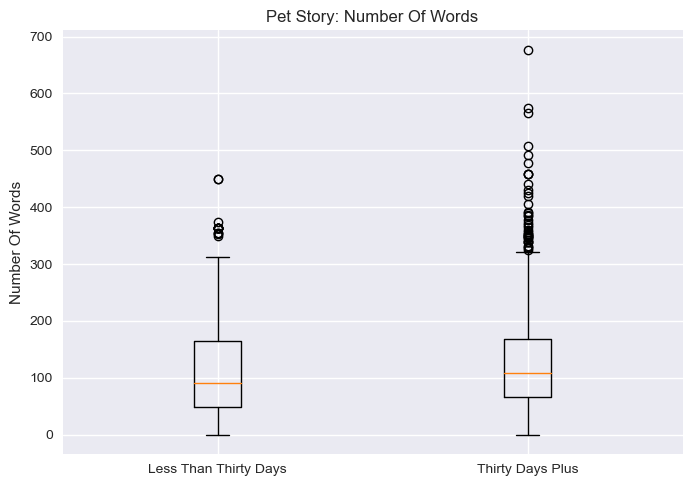

In [120]:


data1 = df_other_days['pet_story_num_words']
data2 = df_thirty['pet_story_num_words']

data = list([data1, data2])

# Figure size
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()

# build a box plot
ax.boxplot(data)

# title and axis labels
ax.set_title('Pet Story: Number Of Words')
ax.set_xlabel('')
ax.set_ylabel('Number Of Words')
xticklabels=['Less Than Thirty Days', 'Thirty Days Plus']
ax.set_xticklabels(xticklabels)

plt.show()

In [119]:
print('df_other_days ',df_other_days['pet_story_num_words'].median())
print('df_thirty ',df_thirty['pet_story_num_words'].median())


df_other_days  91.0
df_thirty  108.0


In [36]:
#histogram

#pet_story_num_words     
#plt.hist(df_thirty['pet_story_num_words'],edgecolor='k')
#plt.show()

In [37]:
#histogram

#plt.hist(df_other_days['pet_story_num_words'],edgecolor='k')
#plt.show()

In [71]:
print('30 days plus')
print(df_thirty['sex'].value_counts(normalize=True))
print('#'*50)
print('Other days')
  

30 days plus
Female    0.529658
Male      0.470342
Name: sex, dtype: float64
##################################################
Other days
Male      0.53833
Female    0.46167
Name: sex, dtype: float64


In [61]:
#plt.style.use('darkgrid')
#set_style('darkgrid[')]

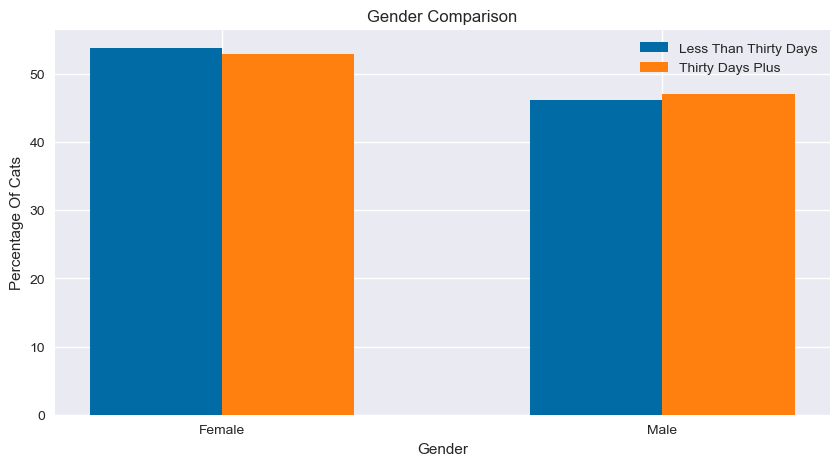

In [88]:
# Numbers of pairs of bars 
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
Other_days = df_other_days['sex'].value_counts(normalize=True)*100
# Specify the values of orange bars (height)
Thirty_days = df_thirty['sex'].value_counts(normalize=True)*100

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, Other_days , width, label='Less Than Thirty Days')
plt.bar(ind + width, Thirty_days, width, label='Thirty Days Plus')

plt.xlabel('Gender')
plt.ylabel('Percentage Of Cats')
plt.title('Gender Comparison')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Female', 'Male'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()


In [67]:
df_thirty['breed_type'].value_counts(normalize=True)

DSH      0.876483
Other    0.111654
DLH      0.011863
Name: breed_type, dtype: float64

In [68]:
df_other_days['breed_type'].value_counts(normalize=True)

DSH      0.899489
Other    0.068143
DLH      0.032368
Name: breed_type, dtype: float64

In [88]:
group_30=df_thirty.groupby(['breed_type','age']).agg(['count'])['cat_name']
group_30.loc['DLH',:]

,count
age,
Adult,12
Kitten,1
Senior,2
Young,2


In [89]:
dfb = df_thirty.groupby(['breed_type']).agg(['count'])['cat_name']
dfb.loc['DLH',:]

count    17
Name: DLH, dtype: int64

In [90]:
group_30.loc['DLH',:]/dfb.loc['DLH',:]

,count
age,
Adult,0.705882
Kitten,0.058824
Senior,0.117647
Young,0.117647


In [70]:
group_30b = df_thirty.groupby(['breed_type','age'])
group_30.agg(['sum'])['num_cats']

sum
age    breed_type     
Adult  DLH          12
       DSH         500
       Other        77
Kitten DLH           1
       DSH         324
       Other        49
Senior DLH           2
       DSH          92
       Other         4
Young  DLH           2
       DSH         340
       Other        30

In [54]:
df_thirty['age'].value_counts(normalize=True)

Adult     0.411026
Kitten    0.260991
Young     0.259595
Senior    0.068388
Name: age, dtype: float64

In [55]:
df_other_days['age'].value_counts(normalize=True)

Kitten    0.616695
Young     0.177172
Adult     0.163543
Senior    0.042589
Name: age, dtype: float64

In [57]:
df_other_days['age'].value_counts()

Kitten    362
Young     104
Adult      96
Senior     25
Name: age, dtype: int64

In [21]:
#df_all.groupby('data_set')['age'].value_counts(normalize=True).plot.bar()

In [43]:
#df_thirty['breed'].value_counts(normalize=True)


In [8]:
df_thirty['color'].value_counts(normalize=True)

Black & White / Tuxedo          0.210042
Black                           0.179079
Tabby (Brown / Chocolate)       0.102092
Gray & White                    0.079498
Tabby (Gray / Blue / Silver)    0.064435
Gray / Blue / Silver            0.051883
Calico                          0.046025
Orange & White                  0.044351
Tabby (Tiger Striped)           0.037657
Tabby (Buff / Tan / Fawn)       0.032636
Tortoiseshell                   0.027615
White                           0.026778
Orange / Red                    0.025941
Tabby (Orange / Red)            0.016736
Brown / Chocolate               0.011715
Buff / Tan / Fawn               0.010879
Dilute Calico                   0.007531
Buff & White                    0.005858
Tabby (Leopard / Spotted)       0.003347
Dilute Tortoiseshell            0.003347
Torbie                          0.002510
Cream / Ivory                   0.002510
Cream Point                     0.002510
Lilac Point                     0.001674
Seal Point      

In [9]:
df_other_days = df_all.loc[df_all.other_days,:]
df_other_days.head(2)
df_other_days['age'].value_counts(normalize=True)

Kitten    0.616695
Young     0.177172
Adult     0.163543
Senior    0.042589
Name: age, dtype: float64

In [ ]:
N=4

Thirty_Days_Plus = df_thirty['age'].value_counts(normalize=True)
Other_Days = df_other_days['age'].value_counts(normalize=True)

width=0.35
ind = np.arange(N) 


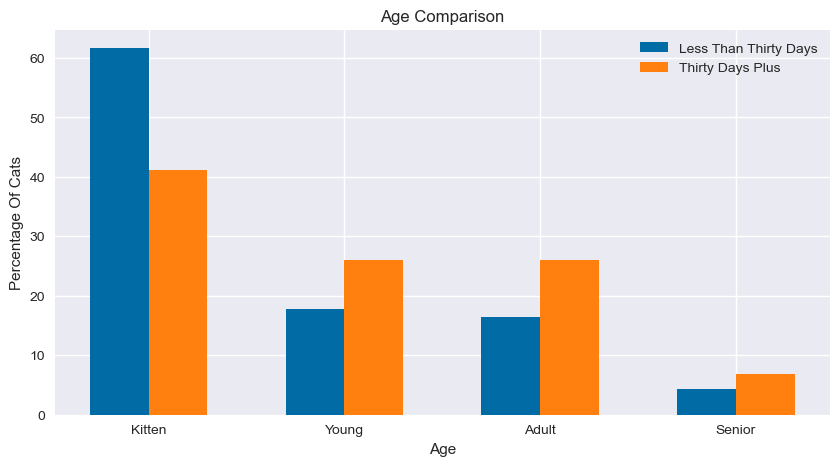

In [89]:
N = 4

# Data on X-axis

# Specify the values of blue bars (height)
Other_Days = df_other_days['age'].value_counts(normalize=True)*100
# Specify the values of orange bars (height)
Thirty_Days_Plus = df_thirty['age'].value_counts(normalize=True)*100

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, Other_Days , width, label='Less Than Thirty Days')
plt.bar(ind + width, Thirty_Days_Plus, width, label='Thirty Days Plus')

plt.xlabel('Age')
plt.ylabel('Percentage Of Cats')
plt.title('Age Comparison')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Kitten', 'Young', 'Adult', 'Senior'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [10]:
df_other_days['color'].value_counts(normalize=True)

Black & White / Tuxedo          0.180791
Black                           0.165725
Tabby (Brown / Chocolate)       0.090395
Gray & White                    0.084746
Orange & White                  0.073446
Tabby (Gray / Blue / Silver)    0.073446
Gray / Blue / Silver            0.047081
Tabby (Buff / Tan / Fawn)       0.041431
Calico                          0.035782
Tabby (Tiger Striped)           0.035782
White                           0.028249
Dilute Tortoiseshell            0.020716
Tortoiseshell                   0.020716
Tabby (Orange / Red)            0.018832
Buff / Tan / Fawn               0.018832
Torbie                          0.015066
Orange / Red                    0.015066
Dilute Calico                   0.011299
Tabby (Leopard / Spotted)       0.011299
Smoke                           0.003766
Buff & White                    0.003766
Brown / Chocolate               0.001883
Lilac Point                     0.001883
Name: color, dtype: float64

In [27]:
rescue_groups_other = list(df_other_days['rescue_group'].unique())
#type(df_other_days['rescue_group'].unique())
df_other_rescue = pd.DataFrame({'rescue_group':rescue_groups_other})
df_other_rescue

,rescue_group
0,KittyKind
1,Liberty Humane Society
2,Brooklyn Animal Action
3,The Lucky Cat Rescue
4,Union City Feral Cat Committee
...,...
89,Friends of Homeless Animals
90,Angel Pets Animal Welfare Society Inc.
91,Mama Chris Animal Rescue Inc.
92,Animal Rescue Force


In [32]:
df_all.groupby(['rescue_group'])['unique_cat_id'].nunique()

rescue_group
A Pathway to Hope                                 10
A Purrfect World                                   1
Adopt-A-Buddy                                      3
Adore-a-Bullie Paws and Claws                      3
AdvoCat Rescue                                     7
Alan Purcell Wayne Township Animal Shelter         7
All About Cats Rescue, Inc                        33
All for the Paws                                  10
Alleykattz Rescue                                 39
Amazing Animals Rescue and Adoptions               3
Anarchy Animal Rescue                              3
Angel Pets Animal Welfare Society Inc.            47
Angels for Animals Network                        10
Angels of Animals Inc.                            11
Animal Adoption Veterinary Center                  4
Animal Life Savers Inc.                           10
Animal Lighthouse Rescue                           2
Animal Rescue Force                               19
Animals Are Forever, Inc         

In [36]:
df_days = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_days_petfinder_combined.csv')

df_days.head(2) 

,Unnamed: 0,cat_name,num_images,num_videos,age,breed,color,size,sex,characteristics,house_trained,health,good_in_a_home_with,adoption_fee,prefers_a_home_without,coat_length,pet_story_num_words,rescue_group,data_set,num_cats
0,0,Ashe and Billie,6,0,Adult,Domestic Short Hair,NaN,Medium,Female,NaN,Yes,"Vaccinations up to date, spayed / neutered.",NaN,NaN,NaN,NaN,89.0,KittyKind,one_day,1
1,1,Billie and Ashe,6,0,Adult,Domestic Short Hair,NaN,Medium,Female,NaN,Yes,"Vaccinations up to date, spayed / neutered.",NaN,NaN,NaN,NaN,89.0,KittyKind,one_day,1


In [37]:

df_spec_needs = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_spec_needs_combined.csv')
df_spec_needs.head(2)

,Unnamed: 0,cat_name,num_images,num_videos,age,breed,color,size,sex,characteristics,house_trained,health,good_in_a_home_with,adoption_fee,prefers_a_home_without,coat_length,pet_story_num_words,rescue_group,data_set,num_cats
0,0,Dougie,5,1,Senior,Domestic Short Hair,NaN,Medium,Female,NaN,NaN,"Spayed / neutered, special needs.",NaN,NaN,NaN,NaN,362.0,City Critters Inc.,thirty_day_spec_needs,1
1,1,Elias,6,1,Adult,Domestic Short Hair,NaN,Medium,Male,NaN,NaN,"Spayed / neutered, special needs.",NaN,NaN,NaN,NaN,168.0,City Critters Inc.,thirty_day_spec_needs,1


In [ ]:
df_spec_needs = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\out_spec_needs_combined.csv')